# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
#import numpy and pandas

import numpy as np
import pandas as pd


# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. We will load the dataset below.

In [4]:
# Run this code:

kickstarter = pd.read_csv('../ks-projects-201801.csv')


Now print the `head` function to examine the dataset.

In [5]:
# Your code here:

kickstarter.head()


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [9]:
# Your code here:

from scipy.stats import mode

kickstarter[['country', 'currency']].agg(mode)

# the code above is used to create a Series, based on two columns of the original DATAFRAME.
# then we proceed to add the aggregated function which is mode from scipy.


country      ([US], [292627])
currency    ([USD], [295365])
dtype: object

The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [21]:

#  Your code here:

from scipy.stats import tmean

percentile75 = np.percentile(kickstarter['goal'], 75)

trimmed_mean = tmean(a = kickstarter['goal'], limits = (0, percentile75))

print('The trimmed mean of the column goal is: ', trimmed_mean)


The trimmed mean of the column goal is:  4874.150287106898


#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, click [here](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [38]:

# Your code here:

kickstarter['goal_met'] = np.where(kickstarter['usd_pledged_real'] > kickstarter['usd_goal_real'], 1, 0)
# np.where( condition = a > b , return x if condition True, else: return y)
kickstarter['goal_met'].value_counts()
# value_counts: measure frequency of the values of a Pandas Series


0    245815
1    132846
Name: goal_met, dtype: int64

Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [39]:

kickstarter['usd'] = np.where(kickstarter['currency'] == 'USD', 1, 0)
kickstarter['usd'].value_counts()


1    295365
0     83296
Name: usd, dtype: int64

Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

In [43]:

# Your code here:

contingency_tb = pd.crosstab(kickstarter['goal_met'], kickstarter['usd'])
contingency_tb



usd,0,1
goal_met,,
0,58685,187130
1,24611,108235


Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [44]:

# Your code here:

from scipy.stats import fisher_exact

oddsratio, pvalue = fisher_exact(contingency_tb)


In [65]:

print('Results\n'.upper())
print('Odds Ratio: ',"%.8f" % oddsratio, '\n\nP-Value: ',pvalue)
pvalue_str = "\033[1m" + str(pvalue) + "\033[0m"
print(f"""
We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal.

We ran a fisher exact test to determine if there was statistically significant association between
the choice of currency and the pledge goal.

When running fisher tests, the null hypothesis is that both variables tested are independent, meaning there is no relationship between them.

In this case, our results showed a pvalue of {pvalue_str} which is less than the significance level of 5%,
meaning that we can reject the null hypothesis.

Rejecting the null hypothesis proves that there is a significant relationship between the two variables (currency and pledge goal).
Therefore, knowing the value of one variable helps to predict the value of the other variable.
""")


RESULTS

Odds Ratio:  1.37918382 

P-Value:  9.75e-321

We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal.

We ran a fisher exact test to determine if there was statistically significant association between
the choice of currency and the pledge goal.

When running fisher tests, the null hypothesis is that both variables tested are independent, meaning there is no relationship between them.

In this case, our results showed a pvalue of 9.75e-321 which is less than the significance level of 5%,
meaning that we can reject the null hypothesis.

Rejecting the null hypothesis proves that there is a significant relationship between the two variables (currency and pledge goal).
Therefore, knowing the value of one variable helps to predict the value of the other variable.



# Challenge 2 - The `linalg` submodule

This submodule allows us to perform various linear algebra calculations. 

Using the solve function, find the solution of the equation system 5x + 2y = 3 and 3x + y = 2 in the cell below.

In [70]:

# Your code here:

from scipy.linalg import solve

AB = np.array([
    [5, 2], # coefficients of x, y in first equation
    [3, 1] # coefficients of x, y in second equation
])

C = np.array([3, 2]) # results of both equations

results = solve(AB, C)

print(f'The solutions are ... X = {list(results)[0]:.0f} , Y = {list(results)[1]:.0f} ')


The solutions are ... X = 1 , Y = -1 


# Challenge 3 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function and first take a sample of 10 rows from `kickstarter`. 

In [72]:
# Your code here:

from scipy.interpolate import interp1d

sample10rows = kickstarter.sample(n = 10, axis = 0)
sample10rows


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
196989,200301774,Concert Cards,Product Design,Design,GBP,2015-02-28,750.0,2015-01-30 14:05:51,1.0,failed,1,GB,1.51,1.52,1138.81,0,0
155165,1789157777,Happy Days; Change the world,Documentary,Film & Video,USD,2015-03-11,5000.0,2015-02-06 18:01:25,1.0,failed,1,US,1.00,1.00,5000.00,0,1
247671,329738182,Innovative Hydroponic Farming - The Future of ...,Farms,Food,USD,2015-02-26,6000.0,2015-01-27 18:59:43,160.0,failed,5,US,160.00,160.00,6000.00,0,1
102951,1523260778,Death Takes a Holiday at Circle Theatre,Theater,Theater,USD,2013-03-28,5000.0,2013-02-27 00:59:27,5073.0,successful,63,US,5073.00,5073.00,5000.00,1,1
345578,830321543,Star Wars: Addonexus - Season 1 (Fan Film),Science Fiction,Film & Video,USD,2015-03-20,5000.0,2015-01-21 03:56:31,100.0,failed,3,US,100.00,100.00,5000.00,0,1
340193,802768310,Not Dead Yet & the Freedom Fighters-Fight Huma...,Apparel,Fashion,USD,2015-10-31,7000.0,2015-10-01 15:02:36,8513.0,successful,100,US,8513.00,8513.00,7000.00,1,1
308099,639320142,THA MATERIALS SOPHOMORE ALBUM RELEASE,Music,Music,USD,2017-08-08,2500.0,2017-07-13 21:01:15,348.0,failed,14,US,110.00,348.00,2500.00,0,1
84782,1431131694,"PREPRODUCTION, Saints and Slaves in Siam",Documentary,Film & Video,USD,2010-04-07,2800.0,2010-03-13 01:13:57,3882.7,successful,113,US,3882.70,3882.70,2800.00,1,1
100229,1509005285,Cheeky Monkeys (Canceled),Tabletop Games,Games,GBP,2016-05-22,19000.0,2016-04-24 15:19:36,1265.0,canceled,89,GB,1822.25,1852.91,27830.26,0,0
160895,1818292376,"A Little Free Library for Buxton Road, London E17",Design,Design,GBP,2014-09-16,150.0,2014-08-26 15:42:54,156.0,successful,17,GB,258.30,254.91,245.11,1,0


Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. Create a function `f` that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

In [75]:
# Your code here:

x = sample10rows['usd_pledged_real']

y = sample10rows['backers']

f = interp1d(x = x, y = y)


Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

In [77]:
# Your code here:

x_new = np.arange(min(y), max(y)+1) # to consider the max value, we need to add + 1 as otherwise np.arange wouldnt have contemplated it (max).
x_new


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113])

Plot function f for all values of `x_new`. Run the code below.

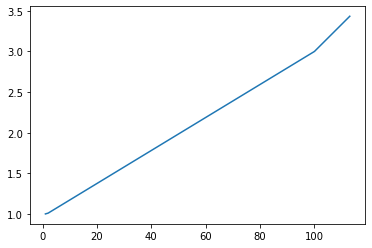

In [78]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))


Next create a function that will generate a cubic interpolation function. Name the function `g`

In [79]:

# Your code here:

g = interp1d(x = x, y = y, kind = 'cubic')


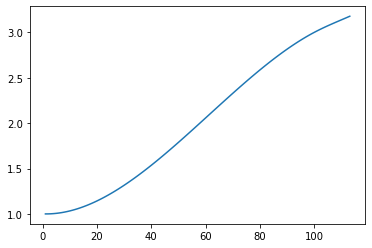

In [80]:
# Run this code:

plt.plot(x_new, g(x_new))


# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](https://en.wikipedia.org/wiki/Binomial_distribution) and about the `binom` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

In the cell below, compute the probability that a die lands on 5 exactly 3 times in 8 tries.

Hint: the probability of rolling a 5 is 1/6.

In [97]:
# Your code here:

from scipy.stats import binom

binomial = binom(8, 1/6) # 8 tries, the die has 1/6 prob of landing on 5

prob = binomial.pmf(3) # exactly three times that the die lands on 5

print(f'\nThe probability that a die lands on 5 exacrly 3 times in 8 tries is {prob} meaning a chance of', "{:.2%}".format(prob))



The probability that a die lands on 5 exacrly 3 times in 8 tries is 0.10419048163389728 meaning a chance of 10.42%
